In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
print("Package Loaded")

Package Loaded


### data1.txt is from Chapter 2 of Ng's Machine learning class ###

In [2]:
xy = np.loadtxt("data1.txt", delimiter=',', unpack=True, dtype='float64')
train_X = xy[0:-1]
train_Y = xy[-1]

n_samples = train_X[0].size

print ""
print "Type of 'train_X' is %s" % type(train_X)
print "Shape of 'train_X' is", train_X.shape
print ("Type of 'train_Y' is ", type(train_Y))
print ("Shape of 'train_Y' is", train_Y.shape)
print ("n_samples' is", n_samples)


Type of 'train_X' is <type 'numpy.ndarray'>
Shape of 'train_X' is (2, 100)
("Type of 'train_Y' is ", <type 'numpy.ndarray'>)
("Shape of 'train_Y' is", (100,))
("n_samples' is", 100)


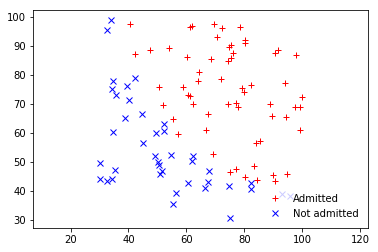

In [3]:
pos = train_Y == 1
neg = train_Y == 0

plt.figure(1)
plt.plot(train_X[0][pos], train_X[1][pos], 'r+', label='Admitted')
plt.plot(train_X[0][neg], train_X[1][neg], 'bx', label='Not admitted')
plt.axis('equal')
plt.legend(loc='lower right')

### Cost Function(minimize negative log-likelihood) ###
$$
J(\theta) = -\frac{1}{m}\sum_{i=1}^{m} [y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))]
$$

### Vectorized Form ###
$$
J(\theta) = -\frac{1}{m}((\log(g(X\theta)))^TY + (\log(1-g(X\theta)))^T(1-Y))
$$

In [4]:
temp_X = np.insert(train_X, 0, 1, axis=0)
temp_Y = train_Y
W = np.random.random((1, 3))

def h(X, w):
    return np.dot(w, X)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(X, w):
    return sigmoid(h(X, w))

def costF(X, Y, w):
    #return np.sum(-Y*np.log(hypothesis(X, w)) - (1-Y)*(np.log(1-hypothesis(X, w)))) / n_samples
    return -(np.dot(np.log(hypothesis(X, w)), Y.T) + np.dot(np.log(1 - hypothesis(X, w)), (1 - Y).T)) / n_samples
    
def gradientDescent(X, Y, w, alpha, num_iters):    #return tf.reduce_mean(-Y*tf.log(hypothesis(X, w)) - (1-Y)*tf.log(1-hypothesis(X, w)))

    #print w, np.dot(X, (hypothesis(X, w) - Y).T) / n_samples
    for i in xrange(num_iters):
        #for j in xrange(w.size):
            #w[0,j] -= np.sum(np.multiply(hypothesis(temp_X, W) - temp_Y, temp_X[j,:])) * alpha / n_samples
        w -= (np.dot(X, (hypothesis(X, w) - Y).T) / n_samples).T * alpha / n_samples
        if i % 1000 == 0:
            print i, w, costF(X, Y, w)
    return w

finalW = gradientDescent(temp_X, temp_Y, W, 0.015, 2000001)

0 [[ 0.52673846  0.48569931  0.75493701]] [ nan]
1000 [[ 0.50612087  0.00691686 -0.00346045]] [ 0.6662627]
2000 [[ 0.4950021   0.00700592 -0.00338668]] [ 0.66543842]
3000 [[ 0.48389755  0.00708233 -0.00330076]] [ 0.66461626]
4000 [[ 0.47280722  0.00715866 -0.00321495]] [ 0.6637962]
5000 [[ 0.46173108  0.0072349  -0.00312923]] [ 0.66297824]
6000 [[ 0.45066912  0.00731106 -0.00304362]] [ 0.66216238]
7000 [[ 0.43962133  0.00738714 -0.00295811]] [ 0.6613486]
8000 [[ 0.4285877   0.00746313 -0.0028727 ]] [ 0.66053691]
9000 [[ 0.4175682   0.00753903 -0.00278738]] [ 0.65972729]
10000 [[ 0.40656284  0.00761486 -0.00270217]] [ 0.65891975]
11000 [[ 0.39557158  0.00769059 -0.00261707]] [ 0.65811428]
12000 [[ 0.38459443  0.00776625 -0.00253206]] [ 0.65731087]
13000 [[ 0.37363137  0.00784182 -0.00244715]] [ 0.65650953]
14000 [[ 0.36268237  0.0079173  -0.00236234]] [ 0.65571024]
15000 [[ 0.35174743  0.00799271 -0.00227763]] [ 0.654913]
16000 [[ 0.34082654  0.00806803 -0.00219303]] [ 0.65411781]
17000

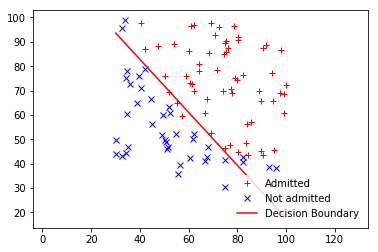

In [5]:
x = np.array([np.min(temp_X[1,:]), np.max(temp_X[1,:])])
y = (-1./W[0,2])*(W[0,0] + W[0,1]*x)

plt.figure(1)
plt.plot(train_X[0][pos], train_X[1][pos], 'r+', label='Admitted')
plt.plot(train_X[0][neg], train_X[1][neg], 'bx', label='Not admitted')
plt.plot(x, y, 'r-', label='Decision Boundary')
plt.axis('equal')
plt.legend(loc='lower right')